Process input Wavedump text files for Channel 0 and Channel 1 and produce HDF5 data files:
---
`./read_waveform.py -n -1 /home/caen/CAEN/workspace/data/wave0-ExtTrgCh0-1-v1.txt`  
`./read_waveform.py -n -1 /home/caen/CAEN/workspace/data/wave1-ExtTrgCh0-1-v1.txt`
Process HDF5 data files and produce summarized output with analysis relevant features: 
---
`./waveformAnalyzer.py --h5_0 output-wave0-ExtTrgCh0-1-v1.h5 --h5_1 output-wave1-ExtTrgCh0-1-v1.h5 -n 20000`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_hdf('../df_out.h5','df_out')
df

Baseline_ch0  Integral_ch0     Mean_ch0     Max_ch0  FitIntegral_ch0  \
0       2049.481203  34048.299154  2141.687658  123.481201     37616.973159   
1       2047.834586  34278.496338  2145.252963  108.834595     37464.174381   
2       2047.431078  31763.571126  2127.936491  120.431030     19479.993190   
3       2048.894737  33979.316243  2147.450660  110.894775     36604.478512   
4       2049.822055  33942.417643  2160.954141  117.822021     36961.378114   
5       2048.145363  33608.770996  2154.210758  119.145264     36880.288397   
6       2048.616541  32147.576660  2135.889323  113.616455     34878.012037   
7       2048.629073  30976.990560  2137.906219  106.629150     33656.365481   
8       2049.704261  33526.922689  2143.160269  118.704346     36327.755757   
9       2049.491228  34464.639323  2146.344330  118.491211     37130.023260   
10      2048.140351  39300.399414  2119.774313  161.140381     44690.312366   
11      2048.105263  34056.438232  2141.810051  111.105225     37411.236528   
12      2047.799499  39003.758301  2100.344218  151.799438     30066.049886   
13      2048.874687  34293.936523  2145.619844  111.874756     37873.599706   
14      2048.453634  33999.770833  2146.981155  124.453613     26294.169254   
15      2048.235589  34873.767253  2148.948228  120.235596     38003.816526   
16      2045.674185  29635.822184  2130.483860  107.674194     32532.780441   
17      2047.583960  34067.164062  2159.533889  110.583984     36952.526101   
18      2048.849624  33301.580729  2140.121112  113.849609     36119.278449   
19      2048.503759  38375.982096  2074.805516  122.503662     47628.646546   
20      2046.857143  34498.890299  2172.681957  108.857178     34494.306395   
21      2048.343358  36737.622070  2151.104938  126.343262     40420.498439   
22      2039.027569  25649.104818  2080.726106  107.027588     27433.384871   
23      2048.020050  34073.751953  2164.757635  113.020020     36710.525344   
24      2048.604010  34678.931641  2157.786082  113.604004     37230.579662   
25      2049.385965  32355.386882  2134.847787  127.385986     35886.348224   
26      2048.280702  35260.572266  2095.294163  111.280762     38665.857281   
27      2042.726817  69402.094401  1649.944240  158.726807     41107.303373   
28      2040.120301  24247.449219  2097.241729  101.120361     25017.636201   
29      2048.223058  33949.160807  2150.370167  110.223145     36655.463716   
...             ...           ...          ...         ...              ...   
19970   2047.884712  34032.705729  2053.787422  115.884766     37503.040296   
19971   2046.017544  41306.955729  2249.361582  116.017578     49545.889384   
19972   2049.340852  33346.613281  2145.748812  103.340820     36343.324629   
19973   2048.310777  34230.847168  2134.039706  124.310791     37558.569652   
19974   2044.070175  24502.187581  2107.252639  107.070190     26907.127193   
19975   2037.776942  25515.855469  2079.412480  114.776978     27603.754757   
19976   2048.446115  34440.471680  2169.763386  111.446045     37044.850423   
19977   2050.576441  32980.232910  2145.881743  112.576416     36571.975502   
19978   2048.491228  45101.858073  2117.426947  234.491211     51026.877907   
19979   2047.894737  33920.649577  2132.510548  113.894775     36953.568143   
19980   2048.135338  34175.789062  2143.240027  105.135254     34085.541125   
19981   2048.556391  34721.057617  2159.027810  117.556396     37937.475194   
19982   2050.205514  33959.621419  2163.647040  109.205566     37024.131316   
19983   2049.578947  34415.564453  2142.849816  115.578857     37162.887715   
19984   2049.616541  34552.892253  2116.138523  113.616455     38145.732421   
19985   2044.691729  25715.235270  2119.965927  109.691772     28109.903031   
19986   2048.032581  45624.634440  2091.042368  240.032471     52983.044251   
19987   2049.706767  33723.927409  2140.505743  119.706787     37654.075394   
19988   2049.927318  33328.629883  2150.604806  111.92724

In [3]:
df_LE_data = df[ ['Integral_ch0','FitIntegral_ch0','BinnedLE_ch0','FitLE_ch0','Integral_ch1','FitIntegral_ch1','BinnedLE_ch1','FitLE_ch1'] ]
df_LE_data = df_LE_data.dropna()
df_LE_data

Integral_ch0  FitIntegral_ch0  BinnedLE_ch0    FitLE_ch0  Integral_ch1  \
0      34048.299154     37616.973159        1904.0  1895.555556  33112.815755   
1      34278.496338     37464.174381        1888.0  1881.177177  32336.714844   
2      31763.571126     19479.993190        1620.0  1869.993994  27104.183594   
3      33979.316243     36604.478512        1892.0  1884.372372  16664.669352   
4      33942.417643     36961.378114        1896.0  1887.567568  33015.847656   
5      33608.770996     36880.288397        1896.0  1887.567568  32186.839844   
6      32147.576660     34878.012037        1892.0  1885.969970  42558.501628   
7      30976.990560     33656.365481        1892.0  1882.774775  30883.171875   
8      33526.922689     36327.755757        1900.0  1890.762763  18598.436523   
9      34464.639323     37130.023260        1892.0  1889.165165  38645.546387   
10     39300.399414     44690.312366        1880.0  1866.798799  24724.791341   
11     34056.438232     37411.236528        1888.0  1879.579580  30538.057780   
12     39003.758301     30066.049886        1804.0  1849.225225  27210.669922   
13     34293.936523     37873.599706        1884.0  1871.591592  35175.301432   
14     33999.770833     26294.169254        1652.0  1890.762763  36827.731120   
15     34873.767253     38003.816526        1900.0  1892.360360  31030.990234   
16     29635.822184     32532.780441        1888.0  1879.579580  31610.319743   
17     34067.164062     36952.526101        1900.0  1893.957958  25746.046875   
18     33301.580729     36119.278449        1896.0  1890.762763  16882.309896   
19     38375.982096     47628.646546        1808.0  1772.540541  29578.315104   
20     34498.890299     34494.306395        1908.0  1905.141141  32113.460937   
21     36737.622070     40420.498439        1900.0  1889.165165  23346.713867   
22     25649.104818     27433.384871        1896.0  1884.372372  41150.125000   
23     34073.751953     36710.525344        1896.0  1889.165165  36537.361979   
24     34678.931641     37230.579662        1904.0  1897.153153  28537.015625   
25     32355.386882     35886.348224        1892.0  1884.372372  25008.022135   
26     35260.572266     38665.857281        1828.0  1820.468468  26951.145833   
27     69402.094401     41107.303373        1892.0  1892.360360  29542.957682   
28     24247.449219     25017.636201        1908.0  1898.750751  16412.280111   
29     33949.160807     36655.463716        1888.0  1881.177177  20846.910156   
...             ...              ...           ...          ...           ...   
19970  34032.705729     37503.040296        1796.0  1788.516517  19807.333333   
19971  41306.955729     49545.889384        1896.0  1885.969970  21531.628906   
19972  33346.613281     36343.324629        1884.0  1877.981982  32701.502604   
19973  34230.847168     37558.569652        1896.0  1885.969970  36381.146240   
19974  24502.187581     26907.127193        1892.0  1884.372372  59049.708008   
19975  25515.855469     27603.754757        1904.0  1890.762763  30606.708333   
19976  34440.471680     37044.850423        1912.0  1905.141141  23455.131592   
19977  32980.232910     36571.975502        1892.0  1879.579580  21365.079753   
19978  45101.858073     51026.877907        1904.0  1892.360360  28319.500651   
19979  33920.649577     36953.568143        1876.0  1868.396396  25690.638672   
19980  34175.789062     34085.541125        1880.0  1874.786787  33196.581706   
19981  34721.057617     37937.475194        1904.0  1900.348348  34002.820312   
19982  33959.621419     37024.131316        1904.0  1897.153153  26937.924154   
19983  34415.564453     37162.887715        1884.0  1874.786787  33877.102214   
19984  34552.892253     38145.732421        1860.0  1850.822823  31163.389323   
19985  25715.235270     28109.903031        1904.0  1895.555556  31133.026367   
19986  45624.634440     52983.044251        1884.0  1869.993994  18444.781738   
19987  33723.927409     37654.075394  

In [4]:
df_LE_data['BinnedLE_diff'] = df_LE_data['BinnedLE_ch1'] - df_LE_data['BinnedLE_ch0']
df_LE_data['FitLE_diff'] = df_LE_data['FitLE_ch1'] - df_LE_data['FitLE_ch0']
df_LE_data

Integral_ch0  FitIntegral_ch0  BinnedLE_ch0    FitLE_ch0  Integral_ch1  \
0      34048.299154     37616.973159        1904.0  1895.555556  33112.815755   
1      34278.496338     37464.174381        1888.0  1881.177177  32336.714844   
2      31763.571126     19479.993190        1620.0  1869.993994  27104.183594   
3      33979.316243     36604.478512        1892.0  1884.372372  16664.669352   
4      33942.417643     36961.378114        1896.0  1887.567568  33015.847656   
5      33608.770996     36880.288397        1896.0  1887.567568  32186.839844   
6      32147.576660     34878.012037        1892.0  1885.969970  42558.501628   
7      30976.990560     33656.365481        1892.0  1882.774775  30883.171875   
8      33526.922689     36327.755757        1900.0  1890.762763  18598.436523   
9      34464.639323     37130.023260        1892.0  1889.165165  38645.546387   
10     39300.399414     44690.312366        1880.0  1866.798799  24724.791341   
11     34056.438232     37411.236528        1888.0  1879.579580  30538.057780   
12     39003.758301     30066.049886        1804.0  1849.225225  27210.669922   
13     34293.936523     37873.599706        1884.0  1871.591592  35175.301432   
14     33999.770833     26294.169254        1652.0  1890.762763  36827.731120   
15     34873.767253     38003.816526        1900.0  1892.360360  31030.990234   
16     29635.822184     32532.780441        1888.0  1879.579580  31610.319743   
17     34067.164062     36952.526101        1900.0  1893.957958  25746.046875   
18     33301.580729     36119.278449        1896.0  1890.762763  16882.309896   
19     38375.982096     47628.646546        1808.0  1772.540541  29578.315104   
20     34498.890299     34494.306395        1908.0  1905.141141  32113.460937   
21     36737.622070     40420.498439        1900.0  1889.165165  23346.713867   
22     25649.104818     27433.384871        1896.0  1884.372372  41150.125000   
23     34073.751953     36710.525344        1896.0  1889.165165  36537.361979   
24     34678.931641     37230.579662        1904.0  1897.153153  28537.015625   
25     32355.386882     35886.348224        1892.0  1884.372372  25008.022135   
26     35260.572266     38665.857281        1828.0  1820.468468  26951.145833   
27     69402.094401     41107.303373        1892.0  1892.360360  29542.957682   
28     24247.449219     25017.636201        1908.0  1898.750751  16412.280111   
29     33949.160807     36655.463716        1888.0  1881.177177  20846.910156   
...             ...              ...           ...          ...           ...   
19970  34032.705729     37503.040296        1796.0  1788.516517  19807.333333   
19971  41306.955729     49545.889384        1896.0  1885.969970  21531.628906   
19972  33346.613281     36343.324629        1884.0  1877.981982  32701.502604   
19973  34230.847168     37558.569652        1896.0  1885.969970  36381.146240   
19974  24502.187581     26907.127193        1892.0  1884.372372  59049.708008   
19975  25515.855469     27603.754757        1904.0  1890.762763  30606.708333   
19976  34440.471680     37044.850423        1912.0  1905.141141  23455.131592   
19977  32980.232910     36571.975502        1892.0  1879.579580  21365.079753   
19978  45101.858073     51026.877907        1904.0  1892.360360  28319.500651   
19979  33920.649577     36953.568143        1876.0  1868.396396  25690.638672   
19980  34175.789062     34085.541125        1880.0  1874.786787  33196.581706   
19981  34721.057617     37937.475194        1904.0  1900.348348  34002.820312   
19982  33959.621419     37024.131316        1904.0  1897.153153  26937.924154   
19983  34415.564453     37162.887715        1884.0  1874.786787  33877.102214   
19984  34552.892253     38145.732421        1860.0  1850.822823  31163.389323   
19985  25715.235270     28109.903031        1904.0  1895.555556  31133.026367   
19986  45624.634440     52983.044251        1884.0  1869.993994  18444.781738   
19987  33723.927409     37654.075394  

(array([  72.,    0.,   99.,  141.,    0.,  173.,  231.,    0.,  347.,
           0.,  556.,  731.,    0., 1049., 1253.,    0., 1502., 1621.,
           0., 1614.,    0., 1525., 1393.,    0., 1279., 1028.,    0.,
         845.,    0.,  718.,  553.,    0.,  377.,  311.,    0.,  249.,
           0.,  189.,  140.,    0.]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 40 Patch objects>)

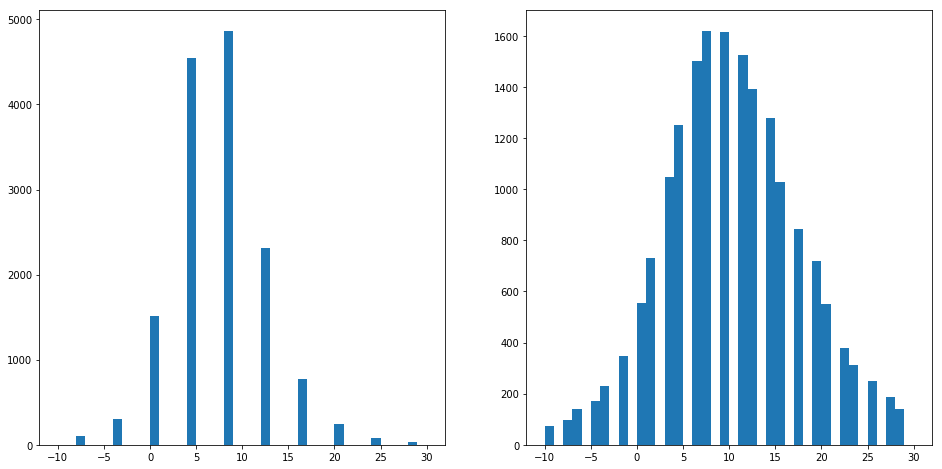

In [5]:
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(16,8) )
axes[0].hist( df_LE_data['BinnedLE_diff'], bins=40, range=(-10,30) )
axes[1].hist( df_LE_data['FitLE_diff'], bins=40, range=(-10,30) )

(array([1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 5.000e+00,
        6.000e+00, 1.700e+01, 3.100e+01, 5.900e+01, 8.100e+01, 8.800e+01,
        1.260e+02, 1.710e+02, 2.850e+02, 4.060e+02, 4.910e+02, 6.150e+02,
        6.840e+02, 6.850e+02, 7.570e+02, 6.980e+02, 7.490e+02, 6.950e+02,
        6.750e+02, 6.900e+02, 6.770e+02, 5.640e+02, 5.570e+02, 7.310e+02,
        8.640e+02, 1.195e+03, 1.277e+03, 1.164e+03, 7.950e+02, 6.100e+02,
        4.260e+02, 3.310e+02, 2.610e+02, 2.480e+02, 1.810e+02, 1.410e+02,
        1.780e+02, 1.920e+02, 2.360e+02, 3.020e+02, 3.190e+02, 2.870e+02,
        1.790e+02, 7.600e+01]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
        16000., 17000., 18000., 19000., 20000., 21000., 22000., 23000.,
        24000., 25000., 26000., 27000., 28000., 29000., 30000., 31000.,
        32000., 33000., 34000., 35000., 36000., 37000., 38000., 39000.,
        40000., 

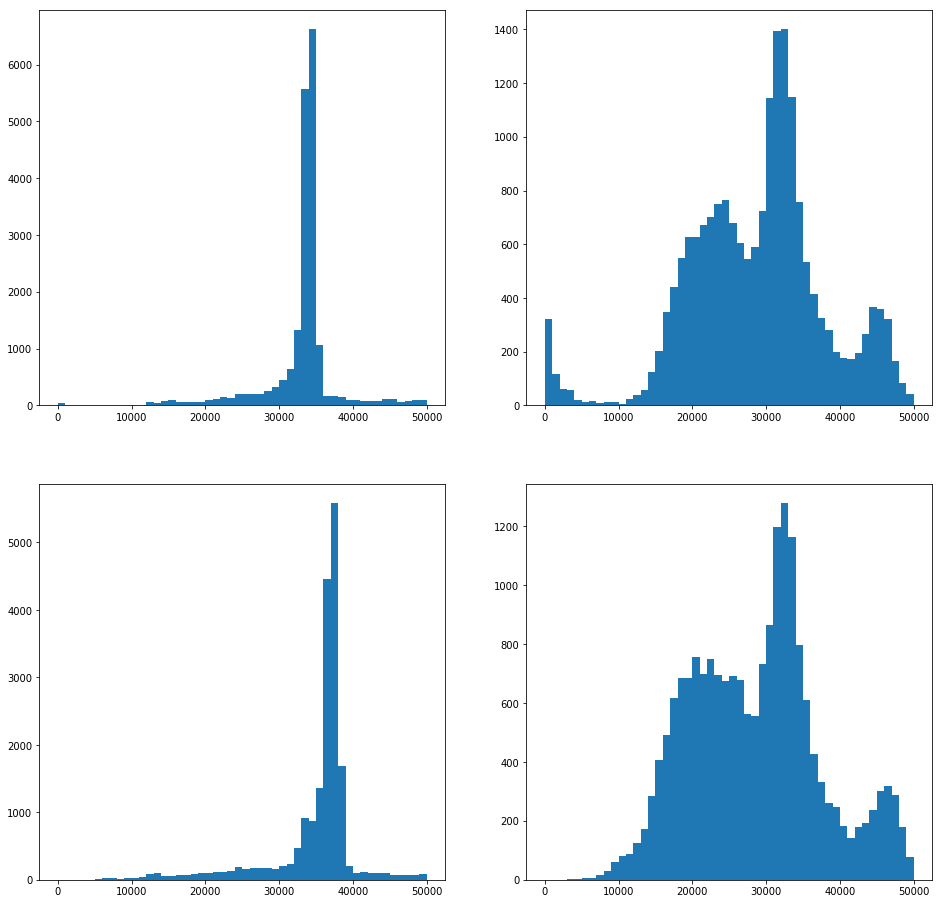

In [6]:
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(16,16) )
axes[0,0].hist( df_LE_data['Integral_ch0'], bins=50, range=(0., 50.e+03) )
axes[0,1].hist( df_LE_data['Integral_ch1'], bins=50, range=(0., 50.e+03) )
axes[1,0].hist( df_LE_data['FitIntegral_ch0'], bins=50, range=(0., 50.e+03) )
axes[1,1].hist( df_LE_data['FitIntegral_ch1'], bins=50, range=(0., 50.e+03) )

In [7]:
msk_ch0 = (df_LE_data['Integral_ch0'] >= 30.e+03) & (df_LE_data['Integral_ch0'] <= 40.e+03)
msk_ch1 = (df_LE_data['Integral_ch1'] >= 28.e+03) & (df_LE_data['Integral_ch1'] <= 40.e+03)
( msk_ch0 & msk_ch1 )

0         True
1         True
2        False
3        False
4         True
5         True
6        False
7         True
8        False
9         True
10       False
11        True
12       False
13        True
14        True
15        True
16       False
17       False
18       False
19        True
20        True
21       False
22       False
23        True
24        True
25       False
26       False
27       False
28       False
29       False
         ...  
19970    False
19971    False
19972     True
19973     True
19974    False
19975    False
19976    False
19977    False
19978    False
19979    False
19980     True
19981     True
19982    False
19983     True
19984     True
19985    False
19986    False
19987    False
19988    False
19989    False
19990    False
19991     True
19992    False
19993     True
19994     True
19995     True
19996     True
19997    False
19998     True
19999     True
Length: 19985, dtype: bool

In [8]:
df_LE_data_sel = df_LE_data.loc[ (msk_ch0 & msk_ch1) ]
df_LE_data_sel

Integral_ch0  FitIntegral_ch0  BinnedLE_ch0    FitLE_ch0  Integral_ch1  \
0      34048.299154     37616.973159        1904.0  1895.555556  33112.815755   
1      34278.496338     37464.174381        1888.0  1881.177177  32336.714844   
4      33942.417643     36961.378114        1896.0  1887.567568  33015.847656   
5      33608.770996     36880.288397        1896.0  1887.567568  32186.839844   
7      30976.990560     33656.365481        1892.0  1882.774775  30883.171875   
9      34464.639323     37130.023260        1892.0  1889.165165  38645.546387   
11     34056.438232     37411.236528        1888.0  1879.579580  30538.057780   
13     34293.936523     37873.599706        1884.0  1871.591592  35175.301432   
14     33999.770833     26294.169254        1652.0  1890.762763  36827.731120   
15     34873.767253     38003.816526        1900.0  1892.360360  31030.990234   
19     38375.982096     47628.646546        1808.0  1772.540541  29578.315104   
20     34498.890299     34494.306395        1908.0  1905.141141  32113.460937   
23     34073.751953     36710.525344        1896.0  1889.165165  36537.361979   
24     34678.931641     37230.579662        1904.0  1897.153153  28537.015625   
30     32063.457682     32346.126291        1912.0  1911.531532  30641.997396   
32     33591.334310     36280.979356        1888.0  1881.177177  36101.123210   
43     34654.077474     37849.483475        1892.0  1884.372372  31736.350911   
47     33732.571452     36539.930117        1892.0  1884.372372  31279.203776   
48     34534.987630     37386.636203        1892.0  1885.969970  30694.507650   
49     34017.324707     33283.537723        1908.0  1901.945946  29834.311198   
51     31672.678548     34615.529691        1884.0  1876.384384  29928.876465   
52     33304.283529     35860.838900        1864.0  1858.810811  34259.763672   
55     34135.493164     36945.205807        1880.0  1871.591592  31776.858073   
63     35493.232829     37789.259384        1904.0  1895.555556  38618.399740   
66     32956.531250     23262.958741        1648.0  1887.567568  28785.091146   
67     33304.183268     36778.916070        1892.0  1881.177177  32534.245768   
68     33668.126953     36351.306600        1900.0  1895.555556  29487.507161   
70     32633.496908     34887.358262        1904.0  1905.141141  33419.968424   
72     31231.782715     33793.449879        1900.0  1892.360360  28289.450521   
74     34797.473307     38594.428948        1892.0  1882.774775  34393.000000   
...             ...              ...           ...          ...           ...   
19929  33169.560710     36247.184226        1904.0  1895.555556  30817.307292   
19930  34759.637166     37832.768124        1892.0  1884.372372  37392.559570   
19933  34297.200358     37177.406423        1880.0  1871.591592  30030.399414   
19934  35401.191406     38522.671952        1912.0  1905.141141  30986.619792   
19936  34779.788086     37872.235880        1908.0  1900.348348  33407.393229   
19941  31238.286458     34455.689867        1892.0  1882.774775  33798.282552   
19943  33850.339600     36722.179874        1916.0  1908.336336  30078.126139   
19944  34337.694987     37342.796835        1892.0  1881.177177  31959.945312   
19945  36173.777669     39862.476896        1880.0  1873.189189  33988.870605   
19947  34802.261230     37614.477035        1892.0  1884.372372  32684.647135   
19949  35056.057129     38191.694469        1896.0  1885.969970  34690.880208   
19956  32915.876302     36404.269350        1884.0  1873.189189  34533.376139   
19957  34405.479492     38252.402680        1888.0  1876.384384  32870.441081   
19962  33866.639648     36788.776658        1888.0  1882.774775  32832.321615   
19963  34198.288411     34373.631056        1904.0  1901.945946  30870.335938   
19965  35071.754232     38212.861844        1884.0  1873.189189  31165.083333   
19967  34234.342448     36728.110578        1884.0  1876.384384  30295.849284   
19972  33346.613281     36343.324629  

(array([ 28.,   0.,  38.,  49.,   0.,  67.,  73.,   0., 128.,   0., 215.,
        318.,   0., 512., 661.,   0., 854., 933.,   0., 864.,   0., 691.,
        526.,   0., 373., 234.,   0., 160.,   0.,  70.,  60.,   0.,  34.,
         12.,   0.,  14.,   0.,  15.,   8.,   0.]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 40 Patch objects>)

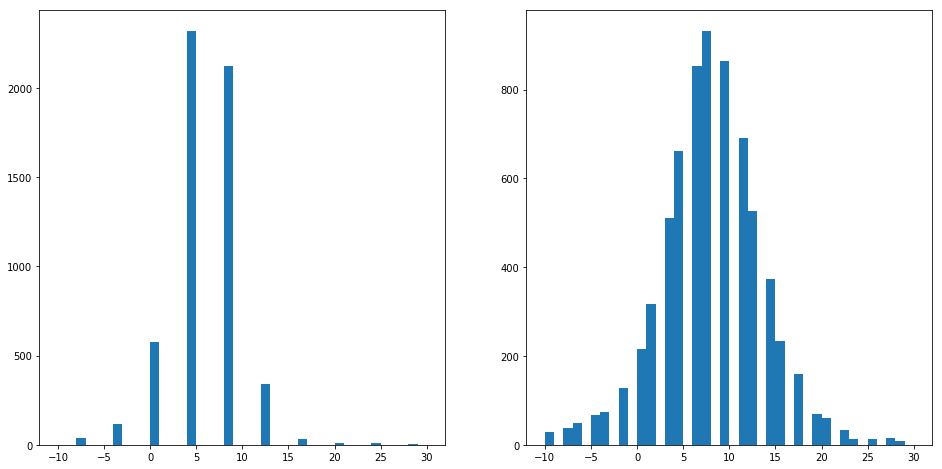

In [9]:
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(16,8) )
axes[0].hist( df_LE_data_sel['BinnedLE_diff'], bins=40, range=(-10,30) )
axes[1].hist( df_LE_data_sel['FitLE_diff'], bins=40, range=(-10,30) )